In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter
from lifelines import WeibullAFTFitter

In [3]:
BASEDIR = './data/train'

In [4]:
pheno_training = pd.read_csv(
    os.path.join(BASEDIR, 'pheno_training.csv')
)
pheno_training.iloc[0:5]

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_328,53.618,24.127,0.0,0,0.0,0.0,0.0,0.0,15.750,133.077,3.020,0
1,Simulated_1644,36.811,27.992,0.0,0,0.0,0.0,0.0,0.0,15.881,108.914,5.480,0
2,Simulated_1710,49.429,23.664,0.0,0,0.0,0.0,0.0,0.0,15.891,110.064,4.388,1
3,Simulated_1732,48.842,26.804,0.0,0,0.0,0.0,0.0,0.0,15.918,128.059,5.119,0
4,Simulated_1727,60.738,29.862,0.0,0,0.0,0.0,0.0,0.0,15.841,169.913,5.740,1


In [5]:
np.shape(pheno_training)

(3615, 13)

In [6]:
print(len(pheno_training['Unnamed: 0'].unique()))

3615


In [7]:
rc_training = pd.read_csv(
    os.path.join(BASEDIR, 'readcounts_training.csv')
)
rc_training.iloc[0:3]

,Unnamed: 0,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.shape(rc_training)

(5748, 3616)

In [9]:
rc_training_t = rc_training.T.reset_index()
rc_training_t.columns = rc_training_t.iloc[0]
rc_training_t = rc_training_t.drop(0).reset_index()
rc_training_t = rc_training_t.drop('index', axis=1)

In [10]:
rc_training_t.iloc[0:5]

,Unnamed: 0,k__Archaea;p__;c__;o__;f__;g__;s__,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Acidilobaceae;g__Acidilobus;s__Acidilobus_saccharovorans,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Caldisphaeraceae;g__Caldisphaera;s__Caldisphaera_lagunensis,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;s__Aeropyrum_camini,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_amylolyticus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_mucosus,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
0,Simulated_328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Simulated_1644,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Simulated_1710,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Simulated_1732,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,Simulated_1727,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
np.shape(rc_training_t)

(3615, 5749)

In [12]:
print(len(rc_training_t['Unnamed: 0'].unique()))

3615


In [13]:
taxtable = pd.read_csv(
    os.path.join(BASEDIR, 'taxtable.csv')
)
taxtable.iloc[0:3]

,Domain,Phylum,Class,Order,Family,Genus,Species
0,k__Archaea,p__,c__,o__,f__,g__,s__
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__


## Imputing categorical integer values

In [14]:
cat_cols = ['Sex', 'Smoking', 'BPTreatment', 'PrevalentDiabetes', 'PrevalentCHD', 'PrevalentHFAIL']

for cols in cat_cols:
    mask = pheno_training[cols].isnull() 
    original = pheno_training[cols]
    residence_encoder = LabelEncoder()
    pheno_training[cols] = residence_encoder.fit_transform(pheno_training[cols])
    
    #if there is NaN values
    if mask.any():
        #adding NaN again
        pheno_training[cols] = pheno_training[cols].where(~mask, original) 
        
        imputer = KNNImputer(n_neighbors=3)
        pheno_training[cols]= imputer.fit_transform(pheno_training[cols].values.reshape(-1, 1))
    
    pheno_training[cols] = pd.Categorical(pheno_training[cols].astype(int))
 

In [15]:
pheno_training.dtypes

Unnamed: 0             object
Age                   float64
BodyMassIndex         float64
Smoking              category
BPTreatment          category
PrevalentDiabetes    category
PrevalentCHD         category
PrevalentHFAIL       category
Event                 float64
Event_time            float64
SystolicBP            float64
NonHDLcholesterol     float64
Sex                  category
dtype: object

## Imputing numeric  values

In [16]:
num_cols = ['Age', 'BodyMassIndex', 'SystolicBP', 'NonHDLcholesterol']

for cols in num_cols:
    if pheno_training[cols].isnull().any():
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        pheno_training[cols] = imputer.fit_transform(pheno_training[cols].values.reshape(-1, 1))

## Removing rows with NaN for Event

In [17]:
#pheno_training[pheno_training['Event'].isna()]
indices = pheno_training['Event'].notna()
pheno_training_p = pheno_training[indices].reset_index().drop('index', axis=1)
rc_training_t_p = rc_training_t[indices].reset_index().drop('index', axis=1)
print(np.shape(pheno_training_p))
print(np.shape(rc_training_t_p))

(3564, 13)
(3564, 5749)


## Removing events that occured before baseline

In [18]:
indices = pheno_training_p['Event_time'] >= 0
pheno_training_p = pheno_training_p[indices]
rc_training_t_p = rc_training_t_p[indices]
print(np.shape(pheno_training_p))
print(np.shape(rc_training_t_p))

(3471, 13)
(3471, 5749)


In [19]:
event = pd.Categorical(pheno_training_p['Event'].astype(int))

In [20]:
event

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 3471
Categories (2, int64): [0, 1]

In [21]:
event_time = pheno_training_p['Event_time']

## Columns with NaN categorical values

In [22]:
pheno_training_p[pheno_training_p.isna().any(axis=1)]

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex


## Concatenating all data

In [23]:
a = pheno_training_p.columns != 'Event'
b = pheno_training_p.columns != 'Event_time'

In [24]:
all_data = pd.concat([pheno_training_p.loc[:, a & b ], rc_training_t_p], axis=1)
all_data.iloc[0:5]

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,SystolicBP,NonHDLcholesterol,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
0,Simulated_328,53.618,24.127,0,0,0,0,0,133.077,3.020,...,0,0,0,0,0,0,0,0,0,0
1,Simulated_1644,36.811,27.992,0,0,0,0,0,108.914,5.480,...,0,0,0,0,0,0,0,0,0,0
2,Simulated_1710,49.429,23.664,0,0,0,0,0,110.064,4.388,...,0,0,0,0,0,0,0,0,0,0
3,Simulated_1732,48.842,26.804,0,0,0,0,0,128.059,5.119,...,0,2,0,0,0,0,0,0,0,0
4,Simulated_1727,60.738,29.862,0,0,0,0,0,169.913,5.740,...,0,0,0,0,0,0,0,0,0,0


## Kaplan

<AxesSubplot:xlabel='timeline'>

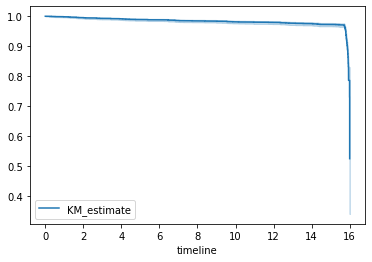

In [25]:
kmf = KaplanMeierFitter()
kmf.fit(durations = event_time, event_observed = event)
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

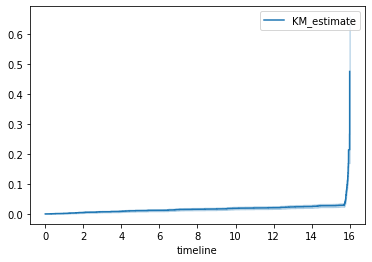

In [26]:
kmf.plot_cumulative_density()

In [27]:
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

inf
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    16.0                     inf


Text(0.5, 1.0, 'Survival of different gender group')

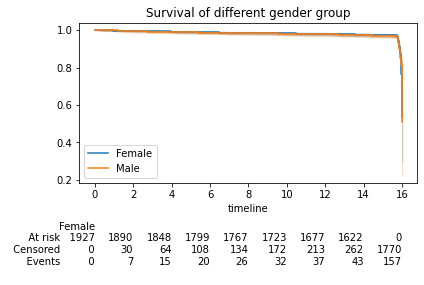

In [28]:
ax = plt.subplot(111)
m = (all_data["Sex"] == 0)
kmf.fit(durations = event_time[m], event_observed = event[m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
kmf.fit(event_time[~m], event_observed = event[~m], label = "Male")
kmf.plot_survival_function(ax = ax)
plt.title("Survival of different gender group")

### Age ranges

In [60]:
all_data['age_range'] = 0

In [61]:
ind_age = (34 < all_data['Age']) & (all_data['Age'] < 44)
all_data.loc[ind_age, 'age_range'] = 1

In [62]:
ind_age = (44 < all_data['Age']) & (all_data['Age'] < 54)
all_data.loc[ind_age, 'age_range'] = 2

In [63]:
ind_age = (54 < all_data['Age']) & (all_data['Age'] < 64)
all_data.loc[ind_age, 'age_range'] = 3

In [64]:
ind_age = 64 < all_data['bAge']
all_data.loc[ind_age, 'age_range'] = 4

In [65]:
all_data['age_range'].value_counts()

3    848
0    722
4    675
2    624
1    602
Name: age_range, dtype: int64

ValueError: num must be 1 <= num <= 4, not 5

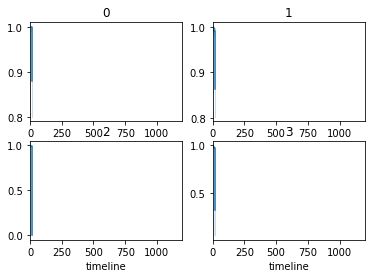

In [74]:
age_groups = all_data.sort_values(by = ['age_range'])["age_range"].unique()
for i, age_groups in enumerate(age_groups):
  ax = plt.subplot(2, 2, i + 1)
  ix = all_data['age_range'] == age_groups
  kmf.fit(event_time[ix], event[ix], label = age_groups)
  kmf.plot_survival_function(ax = ax, legend = False)
  plt.title(age_groups)
  plt.xlim(0, 1200)
plt.tight_layout()

In [67]:
event.value_counts()

0    3178
1     293
dtype: int64

## PCA

In [148]:
col_names = all_data.columns.tolist()

In [40]:
rc_training_pca = rc_training_t_p.iloc[:, 1:]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(rc_training_pca, event, test_size=0.20, random_state = 42)

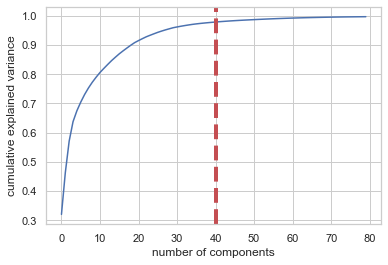

None

In [46]:
pca_test = PCA(n_components=80)
pca_test.fit(x_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=40, ymin=0, ymax=1)
display(plt.show())


In [ ]:
# evr = pca_test.explained_variance_ratio_
# evr
# cvr = np.cumsum(pca_test.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(40))

In [182]:
pca = PCA(n_components=40)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)